![title](Resources/FIFA2.jpg)

# Research Summary
+ Slav - Hypotesis: There is a corelations between GDP and % of talent country is able to produce. Null hypothesis: GDP does not affect the % of talent.
+ Lyle - Question: Is there an ideal defensive player height? Hypothesis: There is an ideal height or range for defensive players to perform optimally. Null Hypothesis: There is no correlation between defensive player score and height.
+ Troy - Hypothesis - Is a a player's wealth determined by the country's wealth? Null Hypothesis - The country's wealth does not affect the average salary of a player.
+ Natalie - Question:  Is there a correlation between player's height and position? Hypothesis:  There is a correlation between taller players and there positions. Null Hypothesis:  There is not a correlation between height and position.
+ Tim - Corelation between GDP and Wage

In [1]:
%matplotlib inline
# Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
from scipy import stats



In [2]:
# Importing files
fifa_df = pd.read_csv("Resources/FIFA_RAW.csv")
gdp_df = pd.read_csv("Resources/GDP.csv")

In [3]:
# Explore FIFA Data Frame
fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Exploring GDP Data Frame
gdp_df.head()

,Name,2019 Population,GDP (IMF),GDP (UN '16),GDP Per Capita,Longitude,Latitude
0,United States,329093.110,21410.23,18624.475000,65058.274850,37.090240,-95.712891
1,China,1420062.022,15543.71,11218.281030,10945.796560,35.861660,104.195397
2,Japan,126854.745,5362.22,4936.211828,42270.551250,36.204824,138.252924
3,Germany,82438.639,4416.80,3477.796274,53576.818510,51.165691,10.451526
4,India,1368737.513,3155.23,2259.642383,2305.211898,20.593684,78.962880


In [5]:
# Listing All Columns in Fifa Data Frame
fifa_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
# listing all gdp columns
gdp_df.columns

Index(['Name', '2019 Population', 'GDP (IMF)', 'GDP (UN '16)',
       'GDP Per Capita', 'Longitude', 'Latitude'],
      dtype='object')

In [7]:
# Replacing the values
fifa_df['Nationality'].replace('England', 'United Kingdom',inplace=True)
fifa_df['Nationality'].replace('Wales', 'United Kingdom',inplace=True)
fifa_df['Nationality'].replace('Korea Republic', 'North Korea',inplace=True)
fifa_df['Nationality'].replace('Scotland', 'United Kingdom',inplace=True)
fifa_df['Nationality'].replace('FYR Macedonia', 'Macedonia',inplace=True)
fifa_df['Nationality'].replace('China PR', 'China',inplace=True)
fifa_df['Nationality'].replace('Northern Ireland', 'United Kingdom',inplace=True)
fifa_df['Nationality'].replace('Trinidad & Tobago', 'Trinidad and Tobago',inplace=True)
fifa_df['Nationality'].replace('St Lucia', 'Saint Lucia',inplace=True)

In [8]:
# Selecting subset of FIFA data set with columns of interest
fifa_subset = fifa_df.loc[:,["Name", "Age", "Nationality", "Overall", "Potential", "Club","Value", "Wage", "Preferred Foot","Weak Foot", "Skill Moves", "Position","Jersey Number", "Joined", "Weight", "Height"]]
fifa_subset = fifa_subset[["Nationality", "Name", "Age", "Overall", "Potential", "Club","Value", "Wage", "Preferred Foot","Weak Foot", "Skill Moves", "Position","Jersey Number", "Joined", "Weight", "Height"]]

# Removing duplicates
fifa_subset = fifa_subset.drop_duplicates(keep="first")

# Selecting subset of GDP data set with columns of interest
gdp_subset = gdp_df.loc[:,["Name", "2019 Population", "GDP (IMF)","Longitude", "Latitude"]]
gdp_subset = gdp_subset.drop_duplicates(keep="first")

# Renaming columns
gdp_subset = gdp_subset.rename(columns = {"Name": "Nationality", "2019 Population": "Population_Mil", "GDP (IMF)": "GDP"})

In [9]:
# Merging Fifa and GDP dataframes (fifa.Nationality = gdp.Name)
master_df = pd.merge(fifa_subset, gdp_subset, on = "Nationality", how = "left", suffixes=("_",""))

# Removing duplicates
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 20 columns):
Nationality       18207 non-null object
Name              18207 non-null object
Age               18207 non-null int64
Overall           18207 non-null int64
Potential         18207 non-null int64
Club              17966 non-null object
Value             18207 non-null object
Wage              18207 non-null object
Preferred Foot    18159 non-null object
Weak Foot         18159 non-null float64
Skill Moves       18159 non-null float64
Position          18147 non-null object
Jersey Number     18147 non-null float64
Joined            16654 non-null object
Weight            18159 non-null object
Height            18159 non-null object
Population_Mil    17669 non-null float64
GDP               17669 non-null float64
Longitude         17495 non-null float64
Latitude          17495 non-null float64
dtypes: float64(7), int64(3), object(10)
memory usage: 2.9+ MB


In [10]:
# Retrive curency exhcange using API for EUR to US conversion of the Value and Wage columns
url = "https://v3.exchangerate-api.com/bulk/62a214ded52f89b9f8343997/USD"

# Making request and getting data in Json format
response = requests.get(url)
data = response.json()

# Extract the rate value and converting EUR to $ Rate
rate = data["rates"]["EUR"]
rate = 1 + (1-rate)
rate

1.12455196

In [11]:
# Cleaning and converting Wage Column in proper data type
master_df["Wage_Mil"] = master_df["Wage"].str.replace("€", "")
master_df["Wage_Mil"] = master_df["Wage_Mil"].str.replace("K", "")
master_df["Wage_Mil"] = master_df["Wage_Mil"].str.replace("M", "")
master_df["Wage_Mil"] = master_df["Wage_Mil"].astype(float) 

# Cleaning and converting Value Column in proper data type
master_df["Value_Mil"] = master_df["Value"].str.replace('€', '')
master_df["Value_Mil"] = master_df["Value_Mil"].str.replace("K", "")
master_df["Value_Mil"] = master_df["Value_Mil"].str.replace("M", "")
master_df["Value_Mil"] = master_df["Value_Mil"].astype(float) 

# Converting the Weight column into proper data type
master_df["Weight_lbs"] = master_df["Weight"].str.replace("lbs", "")
master_df["Weight_lbs"] = master_df["Weight_lbs"].astype(float) 

# Separate Height into ft and inches
Height_temp = master_df["Height"].str.split("'", n = 1, expand = True)
master_df["Height_ft"]= Height_temp[0]
master_df["Height_in"]= Height_temp[1]

# Calculating Height_inch column
master_df["Height_inch"] = master_df["Height_ft"].astype(float) * 12 + master_df["Height_in"].astype(float)

# Converting columns in EUR to $
master_df["Wage_Mil"] = master_df["Wage_Mil"].astype(float) * rate
master_df["Value_Mil"] = master_df["Value_Mil"].astype(float) * rate

# Discarding columns we dont need
master_clean_df = master_df.drop(["Wage", "Value", "Weight", "Height", "Height_ft", "Height_in"], axis= 1)

master_clean_df.head()

,Nationality,Name,Age,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Population_Mil,GDP,Longitude,Latitude,Wage_Mil,Value_Mil,Weight_lbs,Height_inch
0,Argentina,L. Messi,31,94,94,FC Barcelona,Left,4.0,4.0,RF,10.0,"Jul 1, 2004",45101.781,659.694,-38.416097,-63.616672,635.371857,124.262992,159.0,67.0
1,Portugal,Cristiano Ronaldo,33,94,94,Juventus,Right,4.0,5.0,ST,7.0,"Jul 10, 2018",10254.666,260.353,39.399872,-8.224454,455.443544,86.590501,183.0,74.0
2,Brazil,Neymar Jr,26,92,93,Paris Saint-Germain,Right,5.0,5.0,LW,10.0,"Aug 3, 2017",212392.717,2256.850,-14.235004,-51.925280,326.120068,133.259407,150.0,69.0
3,Spain,De Gea,27,91,93,Manchester United,Right,3.0,1.0,GK,1.0,"Jul 1, 2011",46441.049,1583.870,40.463667,-3.749220,292.383510,80.967741,168.0,76.0
4,Belgium,K. De Bruyne,27,91,92,Manchester City,Right,5.0,4.0,RCM,7.0,"Aug 30, 2015",11562.784,587.699,50.503887,4.469936,399.215946,114.704300,154.0,71.0


In [12]:
# Providing informations on columns that contain nulls
master_clean_df.isnull().any()

Nationality       False
Name              False
Age               False
Overall           False
Potential         False
Club               True
Preferred Foot     True
Weak Foot          True
Skill Moves        True
Position           True
Jersey Number      True
Joined             True
Population_Mil     True
GDP                True
Longitude          True
Latitude           True
Wage_Mil          False
Value_Mil         False
Weight_lbs         True
Height_inch        True
dtype: bool

In [13]:
master_clean_df.columns

Index(['Nationality', 'Name', 'Age', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Position',
       'Jersey Number', 'Joined', 'Population_Mil', 'GDP', 'Longitude',
       'Latitude', 'Wage_Mil', 'Value_Mil', 'Weight_lbs', 'Height_inch'],
      dtype='object')

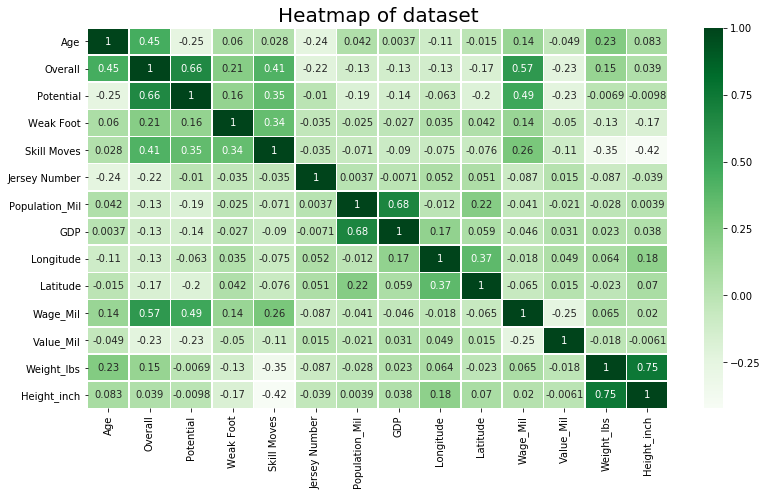

In [14]:
# Producing corelation heatmap between all avaliable data
plt.rcParams['figure.figsize']=(13,7)
heat_map =sns.heatmap(master_clean_df[['Nationality', 'Name', 'Age', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Position',
       'Jersey Number', 'Joined', 'Population_Mil', 'GDP', 'Longitude',
       'Latitude', 'Wage_Mil', 'Value_Mil', 'Weight_lbs', 'Height_inch']].corr(), annot = True, linewidths=.5, cmap='Greens')
heat_map.set_title(label='Heatmap of dataset', fontsize=20)
heat_map

In [15]:
# Isolating columns for coralation between GDP and count of players
slav_df =  master_clean_df.loc[:,['Nationality', 'Name', 'Population_Mil', 'GDP']]
slav_df = slav_df.drop_duplicates(keep="first")
slav_df = slav_df.dropna(how = 'any')

# Creating player coutn dataframe
player_ct = pd.DataFrame({'count' : slav_df.groupby(['Nationality']).size()}).reset_index()

# Merging player_ct df with slav_df
slav_df = pd.merge(slav_df, player_ct, on = "Nationality", how = "left", suffixes=("_",""))
slav_df["count"] = slav_df["count"].astype(float)
slav_df.head()

,Nationality,Name,Population_Mil,GDP,count
0,Argentina,L. Messi,45101.781,659.694,892.0
1,Portugal,Cristiano Ronaldo,10254.666,260.353,312.0
2,Brazil,Neymar Jr,212392.717,2256.850,768.0
3,Spain,De Gea,46441.049,1583.870,1025.0
4,Belgium,K. De Bruyne,11562.784,587.699,260.0


In [16]:
import itertools
CT = slav_df.iloc[:, 4]
GDP = slav_df.iloc[:,3]
#master_df["Weight_lbs"] = master_df["Weight_lbs"].astype(float)

#GDP, CT = zip(*sorted(zip(GDP, CT)))

t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(GDP, CT)
talent_fit = t_slope * CT + t_int

In [17]:
slav_df.dtypes


Nationality        object
Name               object
Population_Mil    float64
GDP               float64
count             float64
dtype: object

Text(0,0.5,' ')

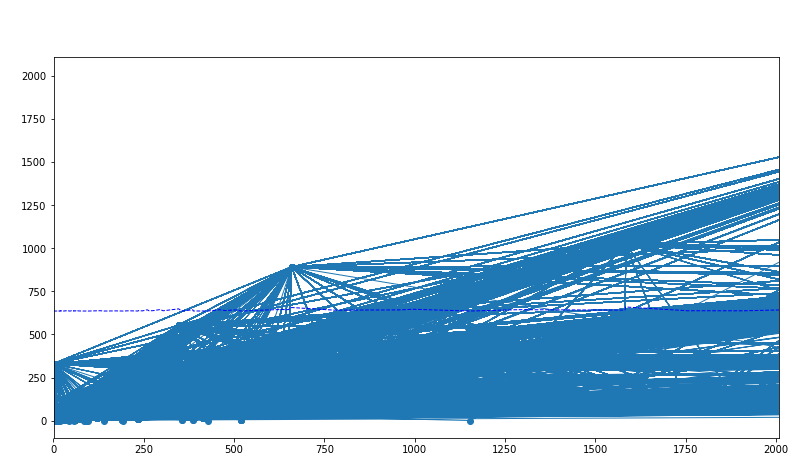

In [18]:
fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle(" ", fontsize=16, fontweight="bold")
ax1.set_xlim(min(CT), max(CT))
ax1.plot(GDP, CT, linewidth=1, marker="o")
ax1.plot(GDP[GDP.argsort()], talent_fit[GDP.argsort()], "b--", linewidth=1)
ax1.set_ylabel(" ")